In [3]:
import os

os.listdir("../SUB pdf")

['0.1 EDA_Preprocess - Jupyter Notebook.pdf',
 '0.2 Preprocessing NoteBook - Jupyter Notebook.pdf',
 '0.3 K Fold Curated - Jupyter Notebook.pdf',
 '0.4 K Fold Noisy - Jupyter Notebook.pdf',
 '1. custom-noisy-model - Jupyter Notebook.pdf',
 '10. 0-k-curated-mobinet - Jupyter Notebook.pdf',
 '11. 4-k-flod-data-Noisy-densenet121-128-ipynb - Jupyter Notebook.pdf',
 '12. 0-k-flod-data-curated-densenet121-128-ipynb - Jupyter Notebook.pdf',
 '2. 0-k-custom-curated-model - Jupyter Notebook.pdf',
 '3. 4-k-flod-data-noisy-densenet169 - Jupyter Notebook.pdf',
 '4. 0-k-flod-data-curated-densenet-169 - Jupyter Notebook.pdf',
 '5. 4-k-flod-data-noisy-resnet50 - Jupyter Notebook.pdf',
 '6. 0-k-resnet-curated - Jupyter Notebook.pdf',
 '7. 4-k-Noisy-resnet101-noisy - Jupyter Notebook.pdf',
 '8. 0-k-curated-resnet101-noisy - Jupyter Notebook.pdf',
 '9. 4-k-Dense-mobinet - Jupyter Notebook.pdf',
 'final.pdf']

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
traindf_noisy=pd.read_csv('../input/freesound-audio-tagging-2019/train_noisy.csv',dtype=str)

traindf_curated=pd.read_csv('../input/freesound-audio-tagging-2019/train_curated.csv',dtype=str)

In [3]:
traindf_noisy.head()

,fname,labels
0,00097e21.wav,Bathtub_(filling_or_washing)
1,000b6cfb.wav,Motorcycle
2,00116cd2.wav,"Marimba_and_xylophone,Glockenspiel"
3,00127d14.wav,"Water_tap_and_faucet,Sink_(filling_or_washing)"
4,0019adae.wav,Raindrop


In [4]:
train_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Curated/Curated_train_0.csv")
train_df.head()

,fname,labels
0,d349d1c7_aug.jpg,"Cutlery_and_silverware,Dishes_and_pots_and_pans"
1,e1c41fe6_aug.jpg,Burping_and_eructation
2,d8b54599.jpg,Accelerating_and_revving_and_vroom
3,15d94574_aug.jpg,Mechanical_fan
4,05be25ad.jpg,Shatter


In [5]:
train_df.shape

(6251, 2)

In [6]:
cv_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Curated/Curated_cv_0.csv")
cv_df.shape

(1563, 2)

In [7]:
    
test_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Curated/Curated_test.csv") 
test_df.shape

(1380, 2)

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb_train = MultiLabelBinarizer()


labels_train = mlb_train.fit_transform([ i.split(",") for i in list(train_df["labels"])])


labels_test = mlb_train.transform([ i.split(",") for i in list(test_df["labels"])])


#mlb_cv = MultiLabelBinarizer()
labels_cv = mlb_train.transform([ i.split(",") for i in list(cv_df["labels"])])


In [9]:
labels_test.shape

(1380, 80)

In [10]:
trainmultidf=pd.DataFrame(data=labels_train,columns=list(mlb_train.classes_))
trainmultidf["fname"]=list(train_df["fname"])

testmultidf=pd.DataFrame(data=labels_test,columns=list(mlb_train.classes_))
testmultidf["fname"]=list(test_df["fname"])


cvmultidf=pd.DataFrame(data=labels_cv,columns=list(mlb_train.classes_))
cvmultidf["fname"]=list(cv_df["fname"])


In [11]:
#We change the ids for the images in the csv files to reflect their new status as jpgs
#https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
from keras_preprocessing.image import ImageDataGenerator



datagen=ImageDataGenerator(rescale=1./255.,zoom_range=[0.5,1.0],brightness_range=[0.8,1.4])


train_generator=datagen.flow_from_dataframe(
    dataframe=trainmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total images Bucket Curated/Total images Bucket Curated",
    x_col="fname",
    y_col=list(mlb_train.classes_),
    subset="training",
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode="raw",
    #color_mode="grayscale",
    target_size=(128,128))



Found 6251 validated image filenames.


In [12]:
train_generator.n

6251

In [13]:
cvmultidf.shape

(1563, 81)

In [14]:
cvmultidf.head()

,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,...,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing),fname
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9a93c380.jpg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0ab47a4c.jpg
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8f5bf633_aug.jpg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,e07009c1.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,877562da_aug.jpg


In [15]:

valid_datagen=ImageDataGenerator(rescale=1./255.)

valid_generator=valid_datagen.flow_from_dataframe(
    dataframe=cvmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total images Bucket Curated/Total images Bucket Curated",
    x_col="fname",
    y_col=list(mlb_train.classes_),
   # subset="validation",
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode="raw",
    #color_mode="grayscale",
    target_size=(128,128))


Found 1563 validated image filenames.


In [16]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total images Bucket Curated/Total images Bucket Curated",
    x_col="fname",
    y_col=None,
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode=None,
   # color_mode="grayscale",
    target_size=(128,128))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1380 validated image filenames.


In [17]:
from sklearn import model_selection
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence



import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv2D, MaxPooling2D, Dropout, Activation, Input,BatchNormalization, AveragePooling2D,GlobalMaxPool2D,PReLU

from tensorflow.keras.models import model_from_json  
from tensorflow.keras.applications import DenseNet169

from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                             EarlyStopping, ReduceLROnPlateau,CSVLogger)

In [18]:
#last_layer = model.get_layer('avg_pool').output

image_input = Input(shape=(128,128, 3))
model =  tf.keras.applications.DenseNet121(input_tensor=image_input, include_top=True)
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
#model=


#output = Dense(80, activation='sigmoid', name='output_layer')(model.layers[-2].output)
x= Dense(80)(x)
output = Activation('sigmoid')(x)
#out = Dense(num_classes, activation='softmax', name='output_layer')(x)

33193984/33188688 [==============================] - 0s 0us/step


In [19]:
model.layers[-4:]

In [20]:
model.layers[-4:]

In [21]:
custom_densenet169_model = Model(inputs=image_input,outputs= output)
#custom_densenet169_model.summary()

In [22]:
custom_densenet169_model.load_weights("../input/sc2weights/DenseNet201.best_weights-128.hdf5")

In [23]:
#from tensorflow.keras.utils import plot_model
#plot_model(custom_densenet169_model, 'model_resnet50.png', show_shapes=True)

In [24]:
opt = tf.keras.optimizers.Adam(lr=0.0009)#tf.keras.optimizers.RMSprop(lr=0.3, decay=1e-6) 
#tf.keras.optimizers.Adam(lr=0.001)#RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
custom_densenet169_model.compile(loss=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM),#'categorical_crossentropy',
              optimizer=opt,
               metrics=['categorical_accuracy'])

In [25]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [26]:
STEP_SIZE_TRAIN

97

In [27]:
# simple early stopping
#earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100,)
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/


#model_checkpoint = ModelCheckpoint('weights_cnn_lstm.best.hdf5', monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)
#filepath="weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5"


csv_logger = CSVLogger(filename='../working/training_log.csv',
                       separator=',',
                       append=True)
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
reduceLROnPlat = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.6,
                              patience=6, min_lr=0,verbose=1)


model_checkpoint = ModelCheckpoint("CuratedTotal.best_weights_128.hdf5", monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model

#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.001 )
es = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1, patience=30, min_delta=0.001 )

callbacks_list = [model_checkpoint, csv_logger, reduceLROnPlat,es]

In [28]:

#custom_densenet169_model.load_weights("../input/sc2weights/total.best_weights.hdf5")
#custom_densenet169_model.load_weights("../input/sc2weights/total.best_weights_iter2.hdf5")

In [29]:
history=custom_densenet169_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=300,
                    callbacks=callbacks_list
)

Epoch 1/300
97/97 [==============================] - ETA: 0s - loss: 5.4966 - categorical_accuracy: 0.2853
Epoch 00001: val_categorical_accuracy improved from -inf to 0.31445, saving model to CuratedTotal.best_weights_128.hdf5
97/97 [==============================] - 57s 584ms/step - loss: 5.4966 - categorical_accuracy: 0.2853 - val_loss: 5.4389 - val_categorical_accuracy: 0.3145
Epoch 2/300
97/97 [==============================] - ETA: 0s - loss: 2.5066 - categorical_accuracy: 0.5101
Epoch 00002: val_categorical_accuracy improved from 0.31445 to 0.46289, saving model to CuratedTotal.best_weights_128.hdf5
97/97 [==============================] - 45s 465ms/step - loss: 2.5066 - categorical_accuracy: 0.5101 - val_loss: 3.8815 - val_categorical_accuracy: 0.4629
Epoch 3/300
97/97 [==============================] - ETA: 0s - loss: 1.8099 - categorical_accuracy: 0.6299
Epoch 00003: val_categorical_accuracy improved from 0.46289 to 0.53711, saving model to CuratedTotal.best_weights_128.hdf5
9

In [30]:
#history.history

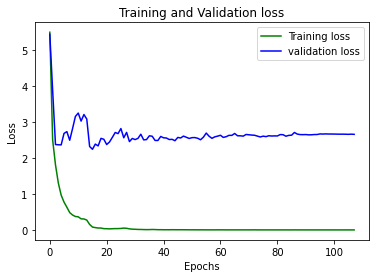

In [31]:
import matplotlib.pyplot as plt


loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = np.range(1,1)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

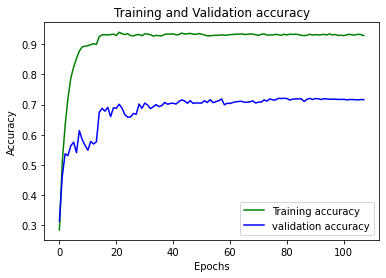

In [32]:
loss_train = history.history['categorical_accuracy']
loss_val = history.history['val_categorical_accuracy']
epochs = range(1,41)
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
res = custom_densenet169_model.predict_generator(valid_generator, verbose=1)

    

25/25 [==============================] - 3s 114ms/step


In [34]:
test_generator.reset()
res_test=custom_densenet169_model.predict_generator(test_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

22/22 [==============================] - 4s 194ms/step


In [35]:
valid_generator.reset()
res_cv=custom_densenet169_model.predict_generator(valid_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

25/25 [==============================] - 3s 103ms/step


In [36]:
train_generator.reset()
res_train=custom_densenet169_model.predict_generator(train_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

98/98 [==============================] - 37s 378ms/step


In [37]:
res_test.shape

(1380, 80)

In [38]:
# Converting taget and identity columns to booleans

target_columns=list(trainmultidf.columns)[:-1]

def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, True, False)
    
def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    for col in target_columns:
        convert_to_bool(bool_df, col)
    return bool_df

test_bool = convert_dataframe_to_bool(testmultidf) 
test_lable_bool=test_bool[list(test_bool.columns)[:-1]].to_numpy()

train_bool = convert_dataframe_to_bool(trainmultidf) 
train_lable_bool=train_bool[list(train_bool.columns)[:-1]].to_numpy()

cv_bool = convert_dataframe_to_bool(cvmultidf) 
cv_lable_bool=cv_bool[list(cv_bool.columns)[:-1]].to_numpy()

In [39]:
cv_lable_bool.shape

(1563, 80)

# Evaluation Metric

In [40]:
import numpy as np
import sklearn.metrics

In [41]:
# Core calculation of label precisions for one test sample.

def _one_sample_positive_class_precisions(scores, truth):
  """Calculate precisions for each true class for a single sample.
  
  Args:
    scores: np.array of (num_classes,) giving the individual classifier scores.
    truth: np.array of (num_classes,) bools indicating which classes are true.

  Returns:
    pos_class_indices: np.array of indices of the true classes for this sample.
    pos_class_precisions: np.array of precisions corresponding to each of those
      classes.
  """
  num_classes = scores.shape[0]
  pos_class_indices = np.flatnonzero(truth > 0)
  # Only calculate precisions if there are some true classes.
  if not len(pos_class_indices):
    return pos_class_indices, np.zeros(0)
  # Retrieval list of classes for this sample. 
  retrieved_classes = np.argsort(scores)[::-1]
  # class_rankings[top_scoring_class_index] == 0 etc.
  class_rankings = np.zeros(num_classes, dtype=np.int)
  class_rankings[retrieved_classes] = range(num_classes)
  # Which of these is a true label?
  retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
  retrieved_class_true[class_rankings[pos_class_indices]] = True
  # Num hits for every truncated retrieval list.
  retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
  # Precision of retrieval list truncated at each hit, in order of pos_labels.
  precision_at_hits = (
      retrieved_cumulative_hits[class_rankings[pos_class_indices]] / 
      (1 + class_rankings[pos_class_indices].astype(np.float)))
  return pos_class_indices, precision_at_hits


In [42]:
# All-in-one calculation of per-class lwlrap.

def calculate_per_class_lwlrap(truth, scores):
  """Calculate label-weighted label-ranking average precision.
  
  Arguments:
    truth: np.array of (num_samples, num_classes) giving boolean ground-truth
      of presence of that class in that sample.
    scores: np.array of (num_samples, num_classes) giving the classifier-under-
      test's real-valued score for each class for each sample.
  
  Returns:
    per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each 
      class.
    weight_per_class: np.array of (num_classes,) giving the prior of each 
      class within the truth labels.  Then the overall unbalanced lwlrap is 
      simply np.sum(per_class_lwlrap * weight_per_class)
  """
  assert truth.shape == scores.shape
  num_samples, num_classes = scores.shape
  # Space to store a distinct precision value for each class on each sample.
  # Only the classes that are true for each sample will be filled in.
  precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
  for sample_num in range(num_samples):
    pos_class_indices, precision_at_hits = (
      _one_sample_positive_class_precisions(scores[sample_num, :], 
                                            truth[sample_num, :]))
    precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
        precision_at_hits)
  labels_per_class = np.sum(truth > 0, axis=0)
  weight_per_class = labels_per_class / float(np.sum(labels_per_class))
  # Form average of each column, i.e. all the precisions assigned to labels in
  # a particular class.
  per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) / 
                      np.maximum(1, labels_per_class))
  # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
  #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
  #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
  #                = np.sum(per_class_lwlrap * weight_per_class)
  return per_class_lwlrap, weight_per_class

In [43]:
# Calculate the overall lwlrap using sklearn.metrics function.

def calculate_overall_lwlrap_sklearn(truth, scores):
  """Calculate the overall lwlrap using sklearn.metrics.lrap."""
  # sklearn doesn't correctly apply weighting to samples with no labels, so just skip them.
  sample_weight = np.sum(truth > 0, axis=1)
  nonzero_weight_sample_indices = np.flatnonzero(sample_weight > 0)
  overall_lwlrap = sklearn.metrics.label_ranking_average_precision_score(
      truth[nonzero_weight_sample_indices, :] > 0, 
      scores[nonzero_weight_sample_indices, :], 
      sample_weight=sample_weight[nonzero_weight_sample_indices])
  return overall_lwlrap

In [44]:
# Accumulator object version.

class lwlrap_accumulator(object):
  """Accumulate batches of test samples into per-class and overall lwlrap."""  

  def __init__(self):
    self.num_classes = 0
    self.total_num_samples = 0
  
  def accumulate_samples(self, batch_truth, batch_scores):
    """Cumulate a new batch of samples into the metric.
    
    Args:
      truth: np.array of (num_samples, num_classes) giving boolean
        ground-truth of presence of that class in that sample for this batch.
      scores: np.array of (num_samples, num_classes) giving the 
        classifier-under-test's real-valued score for each class for each
        sample.
    """
    assert batch_scores.shape == batch_truth.shape
    num_samples, num_classes = batch_truth.shape
    if not self.num_classes:
      self.num_classes = num_classes
      self._per_class_cumulative_precision = np.zeros(self.num_classes)
      self._per_class_cumulative_count = np.zeros(self.num_classes, 
                                                  dtype=np.int)
    assert num_classes == self.num_classes
    for truth, scores in zip(batch_truth, batch_scores):
      pos_class_indices, precision_at_hits = (
        _one_sample_positive_class_precisions(scores, truth))
      self._per_class_cumulative_precision[pos_class_indices] += (
        precision_at_hits)
      self._per_class_cumulative_count[pos_class_indices] += 1
    self.total_num_samples += num_samples

  def per_class_lwlrap(self):
    """Return a vector of the per-class lwlraps for the accumulated samples."""
    return (self._per_class_cumulative_precision / 
            np.maximum(1, self._per_class_cumulative_count))

  def per_class_weight(self):
    """Return a normalized weight vector for the contributions of each class."""
    return (self._per_class_cumulative_count / 
            float(np.sum(self._per_class_cumulative_count)))

  def overall_lwlrap(self):
    """Return the scalar overall lwlrap for cumulated samples."""
    return np.sum(self.per_class_lwlrap() * self.per_class_weight())

In [45]:
#https://www.kaggle.com/voglinio/keras-2d-model-5-fold-log-specgram-curated-only
truth = test_lable_bool
scores = res_test
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.8320447136759421


In [46]:
truth = train_lable_bool
scores = res_train
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.9999308628318584


In [47]:
truth = cv_lable_bool
scores = res_cv
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.8218595492900727


## SUBMISSION

In [48]:
sub_dataframe = pd.DataFrame({'fname':os.listdir('../input/sc2-total-aug-noisy-data/sub2/sub2')})

sub_datagen=ImageDataGenerator(rescale=1./255.)
sub_generator=sub_datagen.flow_from_dataframe(
    dataframe=sub_dataframe,
    directory="../input/sc2-total-aug-noisy-data/sub2/sub2",
    x_col="fname",
    y_col=None,
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(128,128))

Found 3361 validated image filenames.


In [49]:
STEP_SIZE_SUB=sub_generator.n//sub_generator.batch_size

In [50]:
sub_generator.reset()
res_sub=custom_densenet169_model.predict_generator(sub_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

53/53 [==============================] - 11s 214ms/step


In [51]:
res_sub.shape

(3361, 80)

In [52]:
submit_data=pd.DataFrame(res_sub.astype("float64"), columns=list(mlb_train.classes_))

In [53]:
submit_data.insert(0, 'fname', os.listdir('../input/sc2-total-aug-noisy-data/sub2/sub2'))
submit_data["fname"]=submit_data["fname"].apply(lambda x: x.split(".")[0]+".wav")
submit_data.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,f308ee9f.wav,4.471439e-06,4.316949e-08,5.823090e-06,7.316105e-11,3.007721e-08,1.292125e-08,4.765659e-11,1.526320e-10,8.883165e-08,...,1.769290e-14,1.171853e-06,3.831479e-10,2.233764e-05,1.642860e-08,1.195578e-10,7.125212e-09,8.395816e-05,1.142902e-10,1.368231e-06
1,57e25987.wav,1.065797e-11,1.003058e-08,1.891505e-08,6.182001e-11,1.182101e-06,4.709669e-08,2.540667e-11,4.210964e-07,9.355826e-09,...,3.549069e-07,5.974715e-07,4.817446e-09,3.523593e-08,6.272824e-09,8.496252e-12,8.595527e-10,2.362627e-10,1.365850e-08,1.053679e-04
2,85965288.wav,1.178867e-02,3.402996e-09,8.771033e-09,6.911026e-09,8.911034e-04,1.106438e-09,1.783589e-13,1.472241e-07,1.063112e-08,...,5.036910e-11,7.463105e-06,2.173926e-05,6.662994e-10,2.721039e-07,2.835660e-11,1.781896e-16,4.964787e-13,2.949225e-12,8.898747e-09
3,f0d764ff.wav,7.497752e-10,4.836820e-06,3.056871e-04,1.726756e-10,1.259501e-07,1.718508e-06,2.365811e-05,2.791579e-11,9.120449e-13,...,5.559089e-06,1.408131e-07,1.483608e-09,5.045070e-08,1.186742e-11,5.181462e-13,6.537847e-10,1.718971e-10,2.094859e-08,1.535430e-11
4,d337d98e.wav,3.684507e-10,1.053894e-07,1.527448e-07,9.717518e-10,2.708803e-06,4.339337e-01,4.168693e-08,8.435557e-06,6.412660e-08,...,8.510522e-09,2.818864e-06,9.697868e-07,1.024795e-05,3.753812e-05,1.489047e-07,3.839227e-07,1.036688e-06,1.861059e-10,2.018679e-09


In [54]:
submit_data.to_csv("submissionDenseCuratedCV_0_128.csv",index=False )